In [1]:
import pandas as pd

In [2]:
stroke_risk = pd.read_csv('../00-data/healthcare-dataset-stroke-data.csv')

stroke_risk


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
stroke_risk['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [4]:
stroke_risk['stroke'].unique()

array([1, 0])

* rimuovere l'id dal dataset
* eseguire onehotencoding su:
  - gender
  - ever_married
  - work_type
  - Residence_type
  - smoking_status
* eseguire standardizzazione su:
  - age
  - avg_glucose_level
  - bmi

In [5]:
to_remove = ['id']
to_1he = ['work_type', 'smoking_status']
to_01 = ['gender', 'Residence_type', 'ever_married']
to_normalize = ['age', 'avg_glucose_level', 'bmi']

mapping_dict = {
    'gender': {'Male': 1, 'Female': 0},
    'Residence_type': {'Urban': 1, 'Rural': 0},
    'ever_married': {'Yes': 1, 'No': 0}
}

In [6]:
stroke_risk_cp  = stroke_risk.copy()
stroke_risk_cp = stroke_risk_cp.drop(to_remove, axis=1)
stroke_risk_cp

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
stroke_risk_cp = pd.get_dummies(stroke_risk_cp, columns=to_1he, drop_first=True)
for col in to_01:
  stroke_risk_cp[col] = stroke_risk_cp[col].map(mapping_dict[col])

leggere il remapping

mapping_dict = {
    'gender': {'Male': 1, 'Female': 0},
    'Residence_type': {'Urban': 1, 'Rural': 0},
    'ever_married': {'Yes': 1, 'No': 0}
}

In [8]:
stroke_risk_cp

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,67.0,0,1,1,1,228.69,36.6,1,False,True,False,False,True,False,False
1,0.0,61.0,0,0,1,0,202.21,NaN,1,False,False,True,False,False,True,False
2,1.0,80.0,0,1,1,0,105.92,32.5,1,False,True,False,False,False,True,False
3,0.0,49.0,0,0,1,1,171.23,34.4,1,False,True,False,False,False,False,True
4,0.0,79.0,1,0,1,0,174.12,24.0,1,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1,0,1,1,83.75,NaN,0,False,True,False,False,False,True,False
5106,0.0,81.0,0,0,1,1,125.20,40.0,0,False,False,True,False,False,True,False
5107,0.0,35.0,0,0,1,0,82.99,30.6,0,False,False,True,False,False,True,False
5108,1.0,51.0,0,0,1,0,166.29,25.6,0,False,True,False,False,True,False,False


In [9]:
stroke_risk_cp.corr()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
gender,1.000000,-0.027752,0.021223,0.085685,-0.030171,-0.006105,0.054722,-0.026164,0.009081,0.011486,-0.032502,-0.026045,0.089226,0.043121,-0.098952,0.011408
age,-0.027752,1.000000,0.276398,0.263796,0.679125,0.014180,0.238171,0.333398,0.245257,-0.078653,0.116534,0.327989,-0.634215,0.236897,0.119307,0.073133
hypertension,0.021223,0.276398,1.000000,0.108306,0.164243,-0.007913,0.174474,0.167811,0.127904,-0.021608,-0.005413,0.115442,-0.129506,0.058853,0.065063,0.031240
heart_disease,0.085685,0.263796,0.108306,1.000000,0.114644,0.003092,0.161857,0.041357,0.134914,-0.015712,0.000027,0.086760,-0.091634,0.066804,-0.021856,0.044049
ever_married,-0.030171,0.679125,0.164243,0.114644,1.000000,0.006261,0.155068,0.341695,0.108340,-0.090838,0.153830,0.192716,-0.544441,0.171256,0.102845,0.105226
Residence_type,-0.006105,0.014180,-0.007913,0.003092,0.006261,1.000000,-0.004946,-0.000122,0.015458,0.022859,-0.018173,0.010594,-0.002309,0.007654,-0.024466,0.027266
avg_glucose_level,0.054722,0.238171,0.174474,0.161857,0.155068,-0.004946,1.000000,0.175502,0.131945,-0.014675,0.016588,0.062694,-0.102250,0.068111,0.023885,0.017646
bmi,-0.026164,0.333398,0.167811,0.041357,0.341695,-0.000122,0.175502,1.000000,0.042374,-0.028602,0.208029,0.072701,-0.448674,0.107031,0.107964,0.088324
stroke,0.009081,0.245257,0.127904,0.134914,0.108340,0.015458,0.131945,0.042374,1.000000,-0.014882,0.011888,0.062168,-0.083869,0.064556,-0.004129,0.008939
work_type_Never_worked,0.011486,-0.078653,-0.021608,-0.015712,-0.090838,0.022859,-0.014675,-0.028602,-0.014882,1.000000,-0.076081,-0.028728,-0.025915,-0.030095,0.036238,-0.028099


In [10]:
import seaborn as sns

<Axes: >

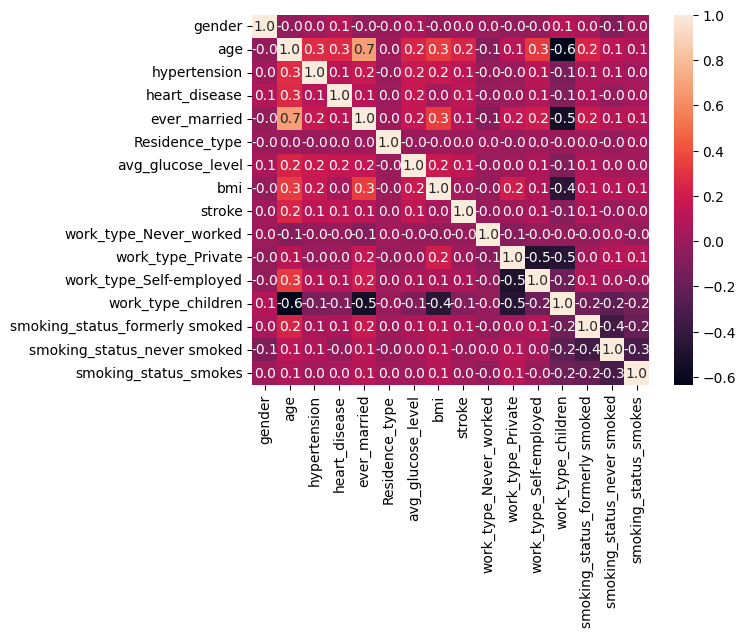

In [11]:
sns.heatmap(stroke_risk_cp.corr(), annot=True, fmt=".1f")

ci sono troppe variabili, rimuovo tutto ciò che ha correlazione tra -0.1 e 0.1 rispeto al target

In [12]:
corr_with_target = stroke_risk_cp.corr()['stroke']

threshold = 0.01

selected_features = corr_with_target[abs(corr_with_target) >= threshold].index.tolist()

print(selected_features)
stroke_risk_simplified = stroke_risk_cp[selected_features]
stroke_risk_simplified

['age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'smoking_status_formerly smoked']


,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked
0,67.0,0,1,1,1,228.69,36.6,1,False,True,False,False,True
1,61.0,0,0,1,0,202.21,NaN,1,False,False,True,False,False
2,80.0,0,1,1,0,105.92,32.5,1,False,True,False,False,False
3,49.0,0,0,1,1,171.23,34.4,1,False,True,False,False,False
4,79.0,1,0,1,0,174.12,24.0,1,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.75,NaN,0,False,True,False,False,False
5106,81.0,0,0,1,1,125.20,40.0,0,False,False,True,False,False
5107,35.0,0,0,1,0,82.99,30.6,0,False,False,True,False,False
5108,51.0,0,0,1,0,166.29,25.6,0,False,True,False,False,True


<Axes: >

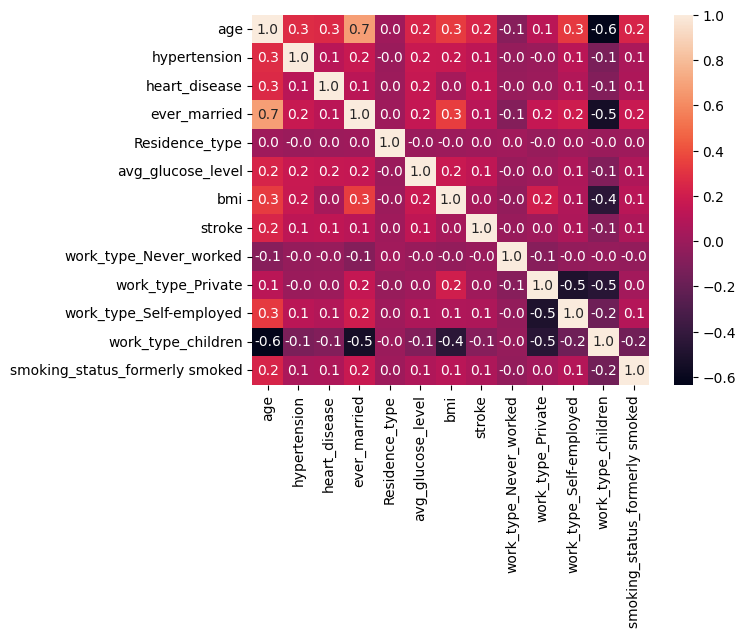

In [13]:
sns.heatmap(stroke_risk_simplified.corr(), annot=True, fmt=".1f")

mi pare che ci sia una correlazione troppo bassa ovunque

In [14]:
stroke_risk['stroke'].value_counts(normalize=True)

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

In [15]:
stroke_risk.shape

(5110, 12)

In [16]:
stroke_risk[stroke_risk['stroke'] == 1].shape

(249, 12)

In [17]:
stroke_risk['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [18]:
stroke_risk[stroke_risk['age'] >= 60].shape

(1376, 12)

provo 4 soglie
45
50
55
60

In [19]:
stroke_risk_cp.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [20]:
stroke_risk_removed_cols = stroke_risk_cp.drop(['work_type_Never_worked', 'work_type_children'], axis=1)
print(stroke_risk_removed_cols)
stroke_risc_simplifiedover45  = stroke_risk_removed_cols[stroke_risk_removed_cols['age']>=45]
stroke_risc_simplifiedover50  = stroke_risk_removed_cols[stroke_risk_removed_cols['age']>=50]
stroke_risc_simplifiedover55  = stroke_risk_removed_cols[stroke_risk_removed_cols['age']>=55]
stroke_risc_simplifiedover60  = stroke_risk_removed_cols[stroke_risk_removed_cols['age']>=60]
stroke_risc_simplifiedover65  = stroke_risk_removed_cols[stroke_risk_removed_cols['age']>=65]
stroke_risc_simplifiedover70  = stroke_risk_removed_cols[stroke_risk_removed_cols['age']>=70]
stroke_risc_simplifiedover75  = stroke_risk_removed_cols[stroke_risk_removed_cols['age']>=75]
stroke_risc_simplifiedover80  = stroke_risk_removed_cols[stroke_risk_removed_cols['age']>=80]


print(f'stroke_risc_simplifiedover45: {stroke_risc_simplifiedover45.shape}')
print(f'stroke_risc_simplifiedover50: {stroke_risc_simplifiedover50.shape}')
print(f'stroke_risc_simplifiedover55: {stroke_risc_simplifiedover55.shape}')
print(f'stroke_risc_simplifiedover60: {stroke_risc_simplifiedover60.shape}')
print(f'stroke_risc_simplifiedover65: {stroke_risc_simplifiedover65.shape}')
print(f'stroke_risc_simplifiedover70: {stroke_risc_simplifiedover70.shape}')
print(f'stroke_risc_simplifiedover75: {stroke_risc_simplifiedover75.shape}')
print(f'stroke_risc_simplifiedover80: {stroke_risc_simplifiedover80.shape}')


      gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0        1.0  67.0             0              1             1               1   
1        0.0  61.0             0              0             1               0   
2        1.0  80.0             0              1             1               0   
3        0.0  49.0             0              0             1               1   
4        0.0  79.0             1              0             1               0   
...      ...   ...           ...            ...           ...             ...   
5105     0.0  80.0             1              0             1               1   
5106     0.0  81.0             0              0             1               1   
5107     0.0  35.0             0              0             1               0   
5108     1.0  51.0             0              0             1               0   
5109     0.0  44.0             0              0             1               1   

      avg_glucose_level   b

<Axes: >

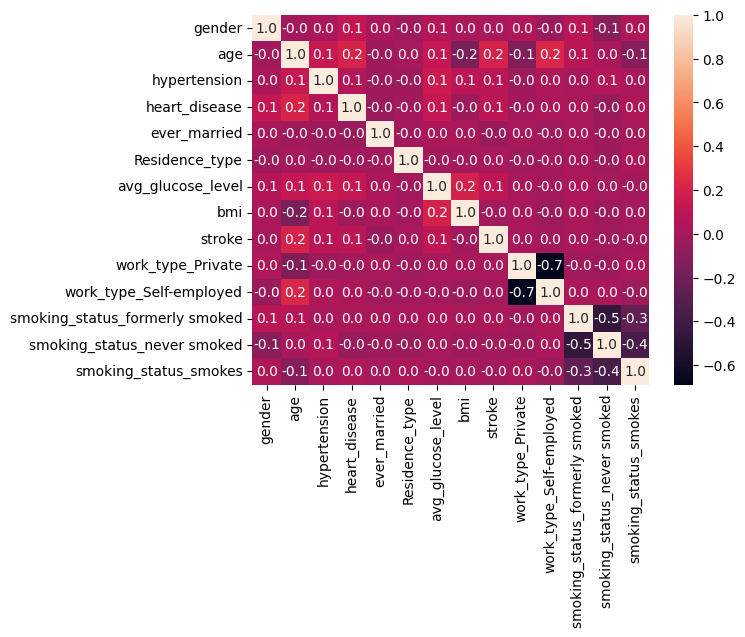

In [21]:
sns.heatmap(stroke_risc_simplifiedover45.corr(), annot=True, fmt=".1f")

<Axes: >

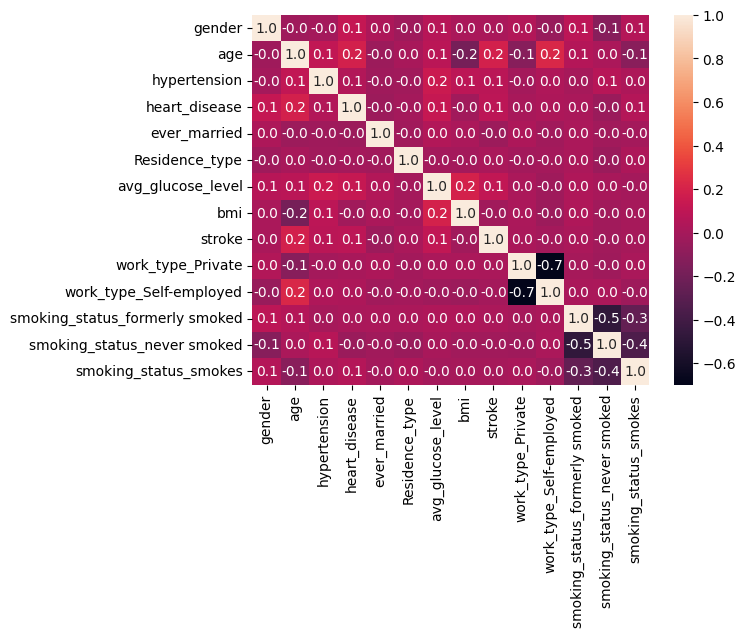

In [22]:
sns.heatmap(stroke_risc_simplifiedover50.corr(), annot=True, fmt=".1f")

<Axes: >

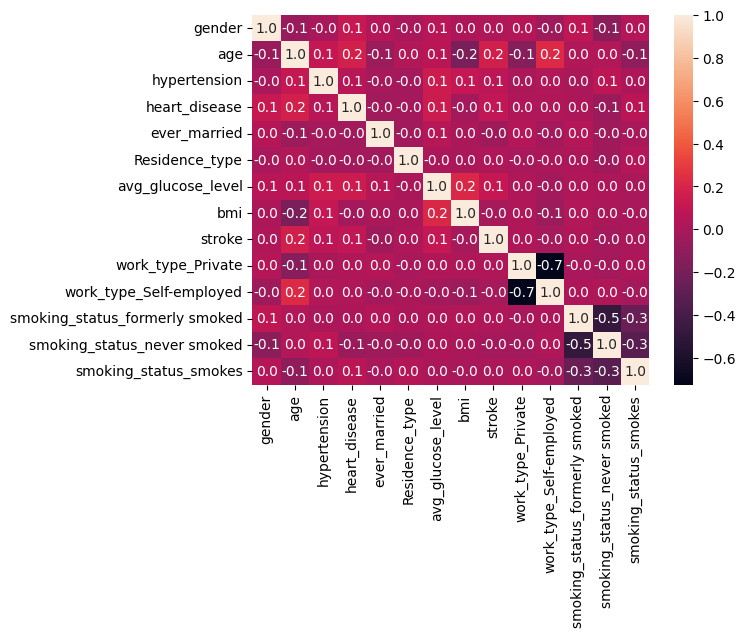

In [23]:
sns.heatmap(stroke_risc_simplifiedover55.corr(), annot=True, fmt=".1f")

<Axes: >

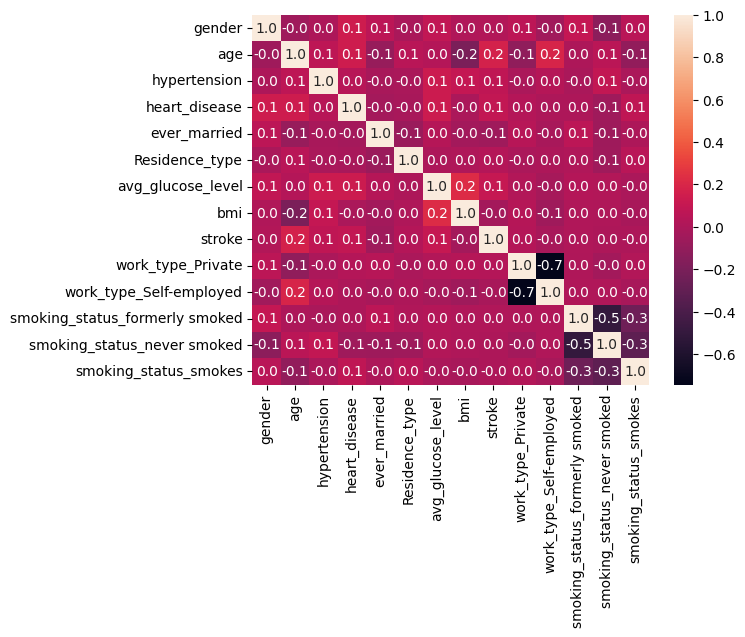

In [24]:
sns.heatmap(stroke_risc_simplifiedover60.corr(), annot=True, fmt=".1f")

<Axes: >

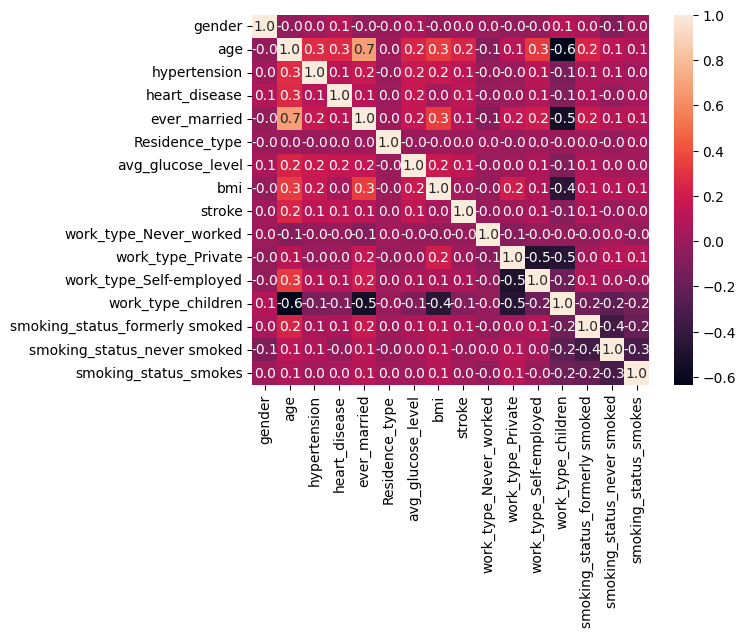

In [25]:
sns.heatmap(stroke_risk_cp.corr(), annot=True, fmt=".1f")

In [26]:
stroke_risk['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [27]:
stroke_risc_simplifiedover60['stroke'].value_counts(normalize=True)

stroke
0    0.868459
1    0.131541
Name: proportion, dtype: float64

In [28]:
print(stroke_risc_simplifiedover65['stroke'].value_counts(normalize=True))
print(stroke_risc_simplifiedover70['stroke'].value_counts(normalize=True))
print(stroke_risc_simplifiedover75['stroke'].value_counts(normalize=True))
print(stroke_risc_simplifiedover80['stroke'].value_counts(normalize=True))

stroke
0    0.84518
1    0.15482
Name: proportion, dtype: float64
stroke
0    0.822517
1    0.177483
Name: proportion, dtype: float64
stroke
0    0.803089
1    0.196911
Name: proportion, dtype: float64
stroke
0    0.784946
1    0.215054
Name: proportion, dtype: float64


<Axes: >

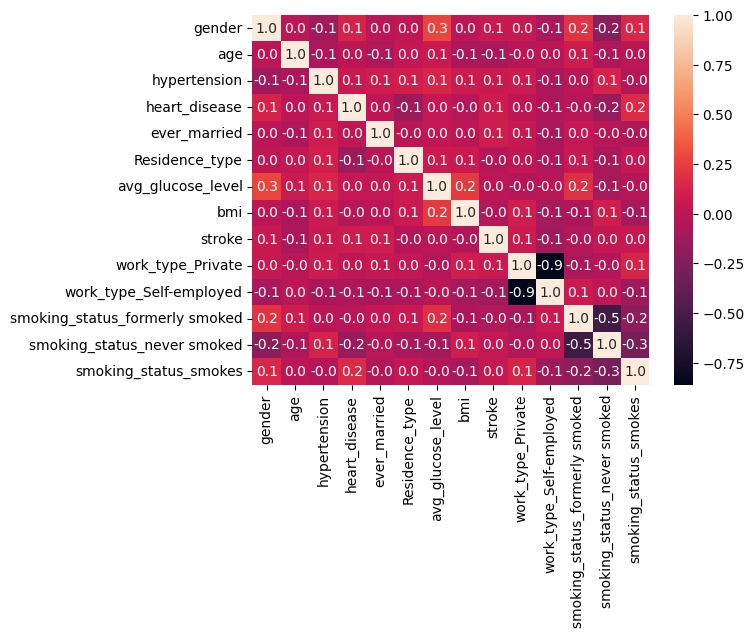

In [29]:
sns.heatmap(stroke_risc_simplifiedover80.corr(), annot=True, fmt=".1f")

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# precision, recall

In [31]:
min_ages = [0, 45,50,55,60, 65, 70, 75, 80]

min_age: 0
accuracy: 0.7397260273972602
proba: 0.49888657373065654
f1_score: 0.24574669187145556


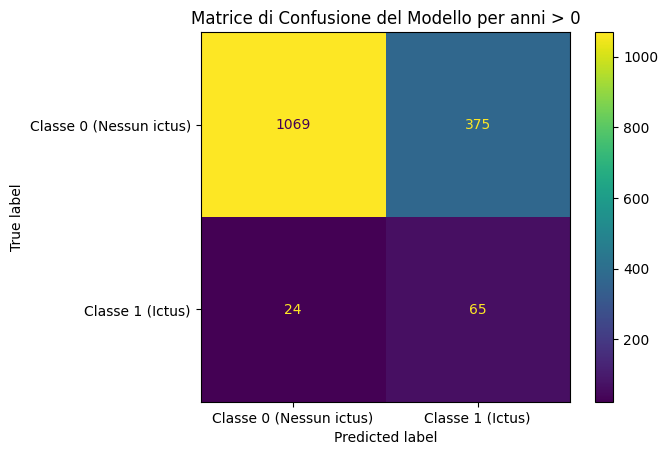

----------------------------------------
min_age: 45
accuracy: 0.6666666666666666
proba: 0.6143384636514571
f1_score: 0.26704545454545453


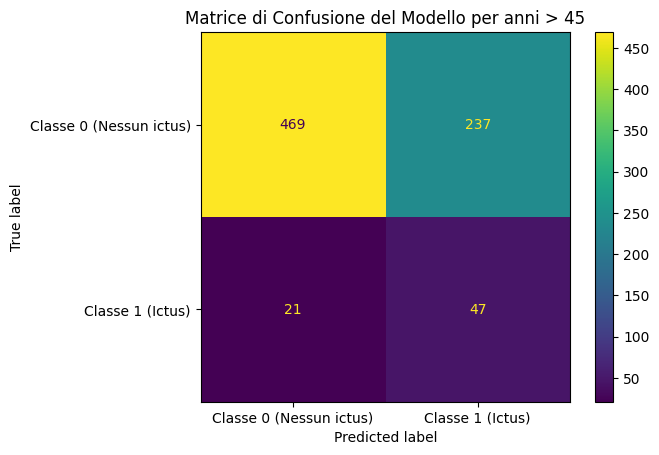

----------------------------------------
min_age: 50
accuracy: 0.6621417797888386
proba: 0.6282430035411436
f1_score: 0.25333333333333335


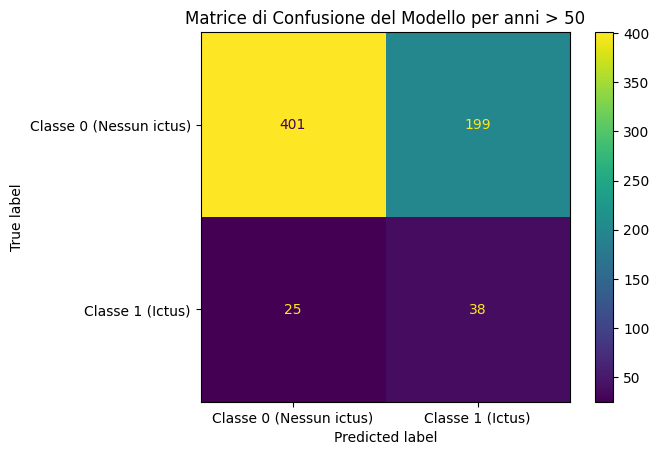

----------------------------------------
min_age: 55
accuracy: 0.6385767790262172
proba: 0.6363236057643951
f1_score: 0.21224489795918366


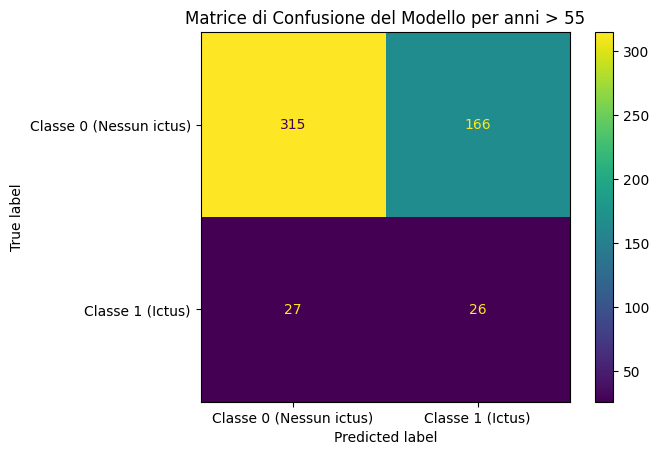

----------------------------------------
min_age: 60
accuracy: 0.6150121065375302
proba: 0.6500246785572047
f1_score: 0.2318840579710145


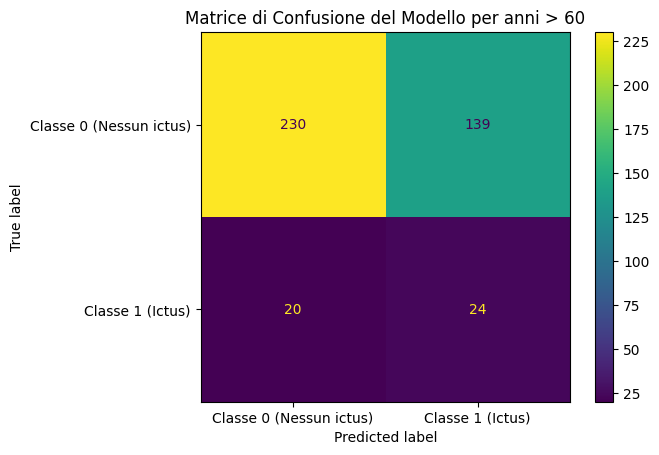

----------------------------------------
min_age: 65
accuracy: 0.5922330097087378
proba: 0.661398445803992
f1_score: 0.35051546391752575


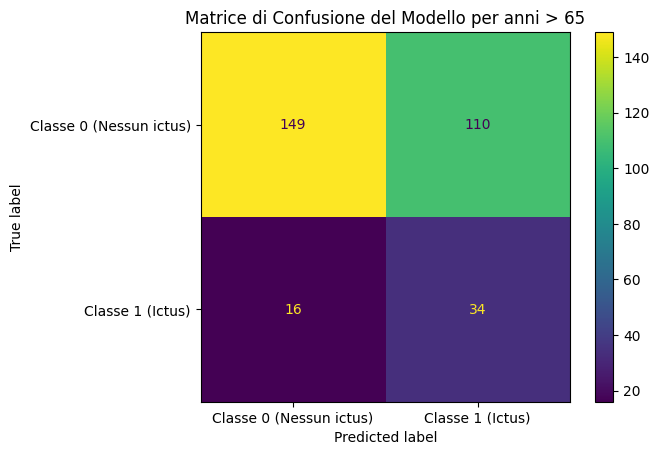

----------------------------------------
min_age: 70
accuracy: 0.5110132158590308
proba: 0.7058959358431277
f1_score: 0.27450980392156865


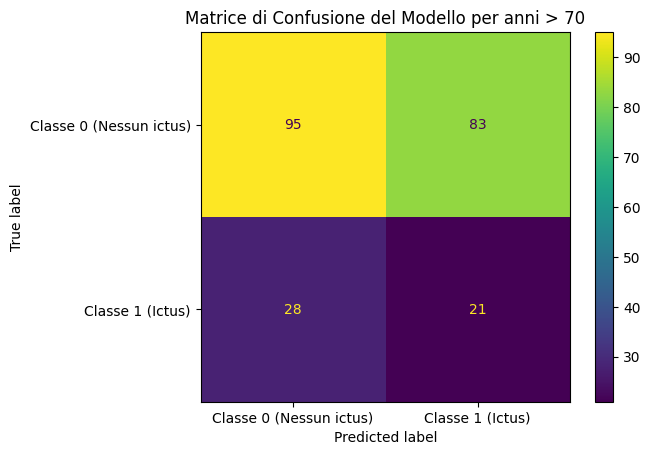

----------------------------------------
min_age: 75
accuracy: 0.5192307692307693
proba: 0.692297495824447
f1_score: 0.32432432432432434


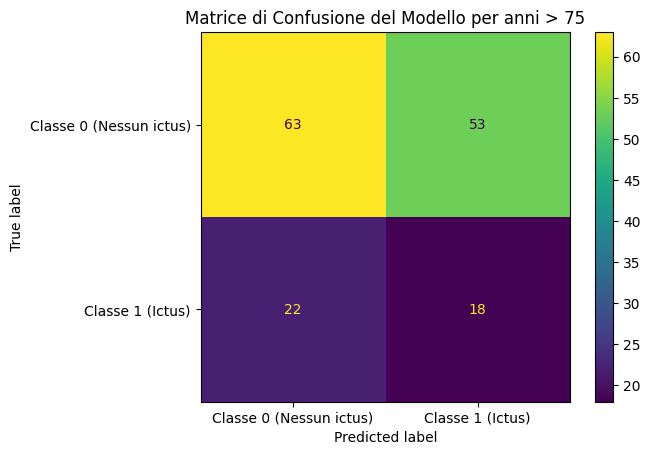

----------------------------------------
min_age: 80
accuracy: 0.5178571428571429
proba: 0.8093952768751611
f1_score: 0.22857142857142856


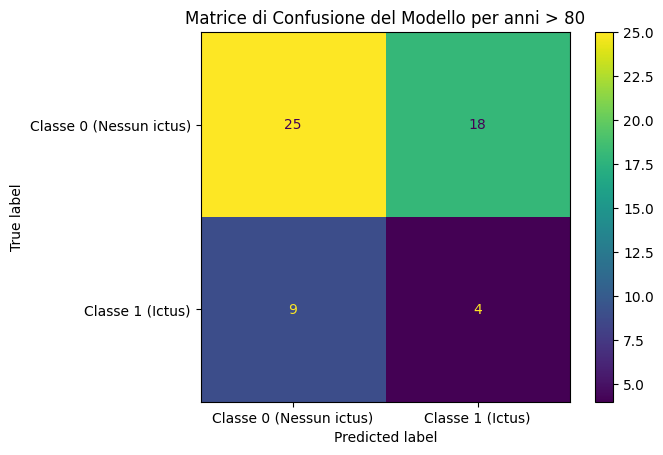

----------------------------------------


In [32]:
output = ['stroke']
stroke_risk_cp['bmi'] = stroke_risk_cp['bmi'].fillna(stroke_risk_cp['bmi'].median())
stroke_risk_cp = stroke_risk_cp[stroke_risk_cp['gender'].notna()]
for min_age in min_ages:
  print(f'min_age: {min_age}')
  stroke_risk_year = stroke_risk_cp[stroke_risk_cp['age'] >= min_age]
  X = stroke_risk_year.drop(output, axis=1).values
  y = stroke_risk_year[output].values.ravel()
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
  le = LabelEncoder()
  le.fit_transform(y_train)
  le.transform(y_test)
  
  ss = StandardScaler()
  X_train = ss.fit_transform(X_train)
  X_test = ss.transform(X_test)
  
  
  lr = LogisticRegression(class_weight='balanced')
  lr.fit(X_train, y_train)
  
  y_pred = lr.predict(X_test)
  y_pred_proba = lr.predict_proba(X_test)
  
  
  
  print(f'accuracy: {accuracy_score(y_test, y_pred)}')
  print(f'proba: {log_loss(y_test, y_pred_proba)}')
  print(f'f1_score: {f1_score(y_test, y_pred)}')
  cm = confusion_matrix(y_test, y_pred)
  class_names = ['Classe 0 (Nessun ictus)', 'Classe 1 (Ictus)']
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
  disp.plot(values_format='d')
  plt.title(f'Matrice di Confusione del Modello per anni > {min_age}')
  plt.show()

  print('----------------------------------------')

  